In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.typing import NDArray
import pickle

In [2]:
data=np.load('C:\\Users\\11203\\pyStudy\\TranFraud\\pgm\\CAP-5771-s24-hw6-main\\CAP-5771-s24-hw6-main\\question1_cluster_data.npy')
labels=np.load('C:\\Users\\11203\\pyStudy\\TranFraud\\pgm\\CAP-5771-s24-hw6-main\\CAP-5771-s24-hw6-main\\question1_cluster_labels.npy')

In [3]:
data.shape

(32000, 2)

In [4]:
labels.shape

(32000,)

In [3]:
n_points = data.shape[0]
indices = np.random.choice(n_points, size=5000, replace=False)

selected_data = data[indices]
selected_labels = labels[indices]
print(selected_data.shape)
print(selected_labels.shape)

(5000, 2)
(5000,)


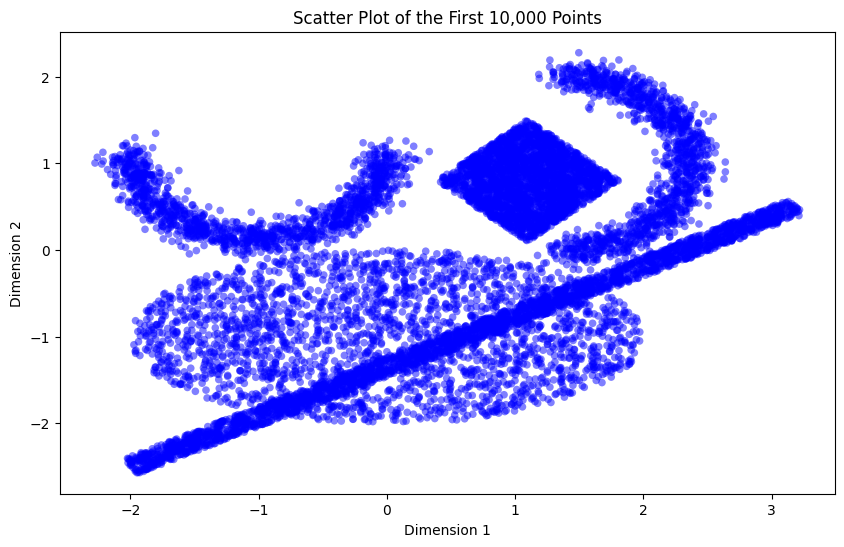

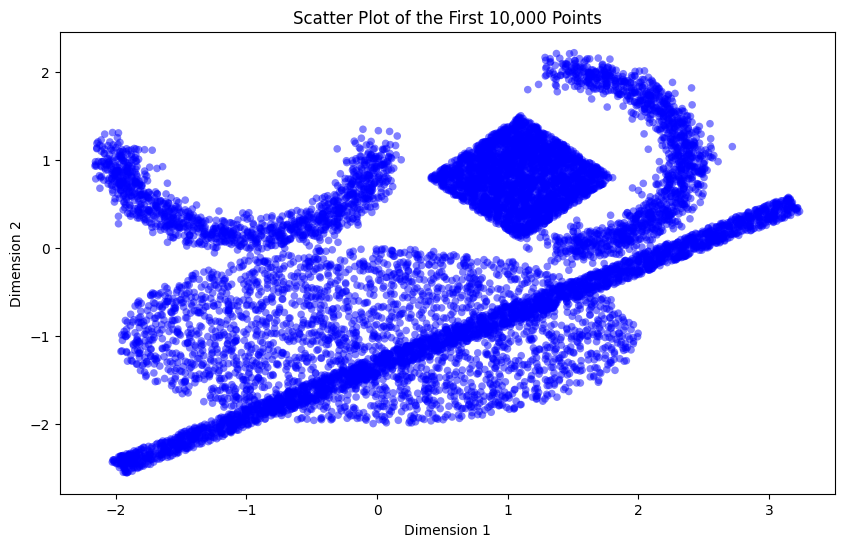

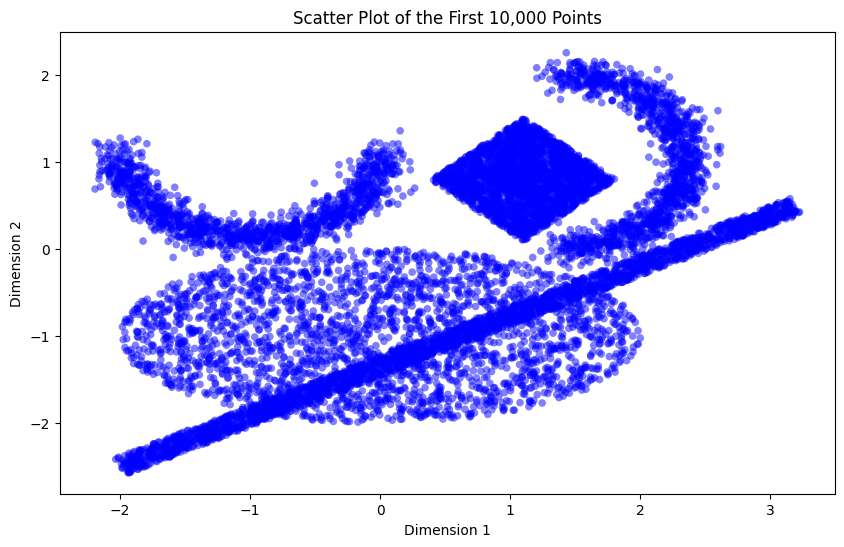

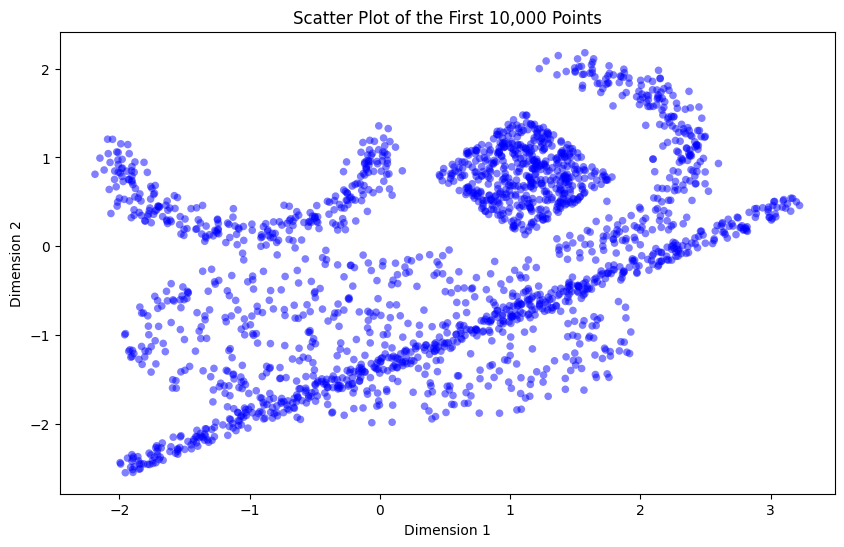

In [5]:
loopvalue=[0,1,2,3]
for i in loopvalue:
    plt.figure(figsize=(10, 6))
    plt.scatter(data[i*10000:(i+1)*10000, 0], data[i*10000:(i+1)*10000, 1], c='blue', alpha=0.5, edgecolors='none', s=30)
    plt.title('Scatter Plot of the First 10,000 Points')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.show()

In [4]:
def  proximity_measure(distance,sigma):
    W = np.exp(-distance ** 2 / (2 * sigma ** 2))
    return W
def construct_similarity_matrix(data, sigma):
    n_samples=data.shape[0]
    similarity_matrix= np.zeros((n_samples,n_samples))
    for i in range(n_samples):
        for j in range(n_samples):
            distance=np.linalg.norm(data[i]-data[j])
            similarity_matrix[i,j]=proximity_measure(distance,sigma)
    return similarity_matrix
def compute_l(W):
    D=np.diag(np.sum(W,axis=1))
    L=D-W
    return L 
number_clusters=5
def calculate_eigens(L_matrix,number_clusters):
    eigenvalues,eigenvectors=np.linalg.eigh(L_matrix)
    return eigenvectors[:, :number_clusters]
iterations = 100
def k_means(data,number_clusters,iterations):
    indices= np.random.choice(data.shape[0],number_clusters,replace=False)
    centroids=data[indices]
    for _ in range(iterations):
        distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
        closest_centroid = np.argmin(distances, axis=0)
        for i in range(number_clusters):
            centroids[i] = data[closest_centroid == i].mean(axis=0)
    return closest_centroid,centroids

In [5]:
def compute_sse(data, cluster_labels, centroids):
    sse = 0.0
    for i, centroid in enumerate(centroids):
        cluster_data = data[cluster_labels == i]
        if cluster_data.size > 0:
            sse += np.sum((cluster_data - centroid) ** 2)
        else:
            print(f"Warning: Cluster {i} has no points assigned.")
    return sse

In [6]:
def calculate_ari(true_labels,predicted_labels):
    contingency_matrix = np.zeros((len(np.unique(true_labels)), len(np.unique(predicted_labels))))
    for i in range(len(true_labels)):
        contingency_matrix[true_labels[i], predicted_labels[i]] += 1
        n_samples = len(true_labels)
        n_ij_combinations = np.sum(contingency_matrix * (contingency_matrix - 1)) / 2
        a_i = np.sum(contingency_matrix, axis=1)
        b_j = np.sum(contingency_matrix, axis=0)
        n_choose_2 = n_samples * (n_samples - 1) / 2
        
        sum_combinations_a_i = np.sum(a_i * (a_i - 1)) / 2
        sum_combinations_b_j = np.sum(b_j * (b_j - 1)) / 2
        
        expected_index = (sum_combinations_a_i * sum_combinations_b_j) / n_choose_2
        max_index = (sum_combinations_a_i + sum_combinations_b_j) / 2
        ARI = (n_ij_combinations - expected_index) / (max_index - expected_index)
    return ARI

In [7]:
list_i=[0,1,2,3,4]
slice={}
slice_labels={}
for i in list_i:
    slice[i]=selected_data[i*1000:(i+1)*1000]
    slice_labels[i]=selected_labels[i*1000:(i+1)*1000]



In [30]:
#sigma_list=[1,2,3,4,5,6,7,8,9,10]
sigma_list=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
groups={}
sse_list1=[]
ari_list1=[]
max_ari = float('-inf')
best_sigma = None
for i in range(10):
    sigma=sigma_list[i]
    smatrix=construct_similarity_matrix(slice[0],sigma)
    L_matrix=compute_l(smatrix)
    eigenvectors_L=calculate_eigens(L_matrix,number_clusters)
    normalized_eigenvectors = eigenvectors_L / np.linalg.norm(eigenvectors_L, axis=1, keepdims=True)
    clusters,centroids = k_means(normalized_eigenvectors, number_clusters, iterations)
    sse = compute_sse(normalized_eigenvectors, slice_labels[0], centroids)
    print(f"sigma:{sigma_list[i]}SSE {sse}:")
    ari=calculate_ari(slice_labels[0],clusters)
    sse_list1.append(sse)
    ari_list1.append(ari)
    print(f"sigma:{sigma_list[i]}ARI {ari}:")
    groups[i]= {"sigma": sigma, "ARI": ari, "SSE": sse}
    if ari > max_ari:
        max_ari = ari
        best_sigma = sigma
print(f"The sigma value with the highest ARI is: {best_sigma} (ARI: {max_ari})")

sigma:0.1SSE 988.4882072182256:
sigma:0.1ARI 0.58807624320855:


C:\Users\11203\AppData\Local\Temp\ipykernel_29420\1926888580.py:16: RuntimeWarning: invalid value encountered in scalar divide
  ARI = (n_ij_combinations - expected_index) / (max_index - expected_index)


sigma:0.2SSE 1735.67271929721:
sigma:0.2ARI 0.5810484950107265:
sigma:0.3SSE 1468.113384034068:
sigma:0.3ARI 0.4946704908643449:
sigma:0.4SSE 1480.8656050151872:
sigma:0.4ARI 0.4918063475753397:
sigma:0.5SSE 1018.8534105137458:
sigma:0.5ARI 0.34004612093121206:
sigma:0.6SSE 1327.0627303730569:
sigma:0.6ARI 0.338315302455084:
sigma:0.7SSE 1324.1116008246963:
sigma:0.7ARI 0.32324907646123424:
sigma:0.8SSE 759.138383946889:
sigma:0.8ARI 0.24911456491265138:
sigma:0.9SSE 1258.5385383653695:
sigma:0.9ARI 0.29460500677121043:
sigma:1SSE 1011.1858697539661:
sigma:1ARI 0.2865452084151827:
The sigma value with the highest ARI is: 0.1 (ARI: 0.58807624320855)


In [31]:
sse_list1

[988.4882072182256,
 1735.67271929721,
 1468.113384034068,
 1480.8656050151872,
 1018.8534105137458,
 1327.0627303730569,
 1324.1116008246963,
 759.138383946889,
 1258.5385383653695,
 1011.1858697539661]

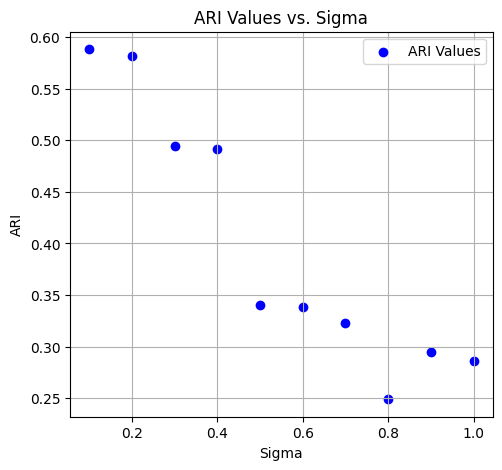

In [32]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_ARI = plt.scatter(sigma_list, ari_list1, c='blue', label='ARI Values')
plt.xlabel('Sigma')
plt.ylabel('ARI')
plt.title('ARI Values vs. Sigma')
plt.legend()
plt.grid(True)

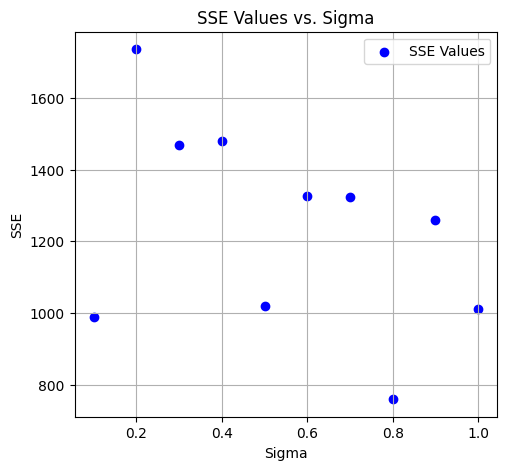

In [34]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_SSE= plt.scatter(sigma_list, sse_list1, c='blue', label='SSE Values')
plt.xlabel('Sigma')
plt.ylabel('SSE')
plt.title('SSE Values vs. Sigma')
plt.legend()
plt.grid(True)

In [28]:
groups

{0: {'sigma': 0.1, 'ARI': 0.5783463131278127, 'SSE': 1574.8050303961593},
 1: {'sigma': 0.2, 'ARI': 0.5447020495719174, 'SSE': 1915.8071149619184},
 2: {'sigma': 0.3, 'ARI': 0.4642380682975447, 'SSE': 1226.2129063657512},
 3: {'sigma': 0.4, 'ARI': 0.53601384537633, 'SSE': 1557.0418429559918},
 4: {'sigma': 0.5, 'ARI': 0.46026166670617014, 'SSE': 977.5867602429764},
 5: {'sigma': 0.6, 'ARI': 0.3409051967266565, 'SSE': 1154.214950938539},
 6: {'sigma': 0.7, 'ARI': 0.2791730187860678, 'SSE': 1004.8448028704966},
 7: {'sigma': 0.8, 'ARI': 0.3112646606381101, 'SSE': 777.9561566271301},
 8: {'sigma': 0.9, 'ARI': 0.29460500677121043, 'SSE': 1014.9969294909481},
 9: {'sigma': 1, 'ARI': 0.2865452084151827, 'SSE': 1115.309242538866}}

In [38]:
smatrix=construct_similarity_matrix(slice[0],sigma)
L_matrix=compute_l(smatrix)
teigenvalues,_=np.linalg.eigh(L_matrix)
teigenvalues

array([-5.42368104e-13,  4.28567452e+01,  5.52567057e+01,  7.08432135e+01,
        7.19728069e+01,  7.42360324e+01,  7.63218929e+01,  7.78846317e+01,
        7.92606833e+01,  8.08038274e+01,  8.16026167e+01,  8.32038386e+01,
        8.38407425e+01,  8.42796237e+01,  8.46717659e+01,  8.62267124e+01,
        8.78331582e+01,  8.82422351e+01,  8.89151961e+01,  9.08355551e+01,
        9.28465410e+01,  9.36166168e+01,  9.43026396e+01,  9.55502011e+01,
        9.76630893e+01,  9.78086340e+01,  9.82554304e+01,  9.98611879e+01,
        1.01248028e+02,  1.01539844e+02,  1.03143986e+02,  1.03992298e+02,
        1.05070574e+02,  1.05766041e+02,  1.06013406e+02,  1.06599782e+02,
        1.07020782e+02,  1.08366312e+02,  1.09559561e+02,  1.11096281e+02,
        1.11484598e+02,  1.13266202e+02,  1.14390775e+02,  1.16423737e+02,
        1.16918408e+02,  1.17535619e+02,  1.18165564e+02,  1.19327172e+02,
        1.20398642e+02,  1.21378458e+02,  1.23266013e+02,  1.24463859e+02,
        1.25835371e+02,  

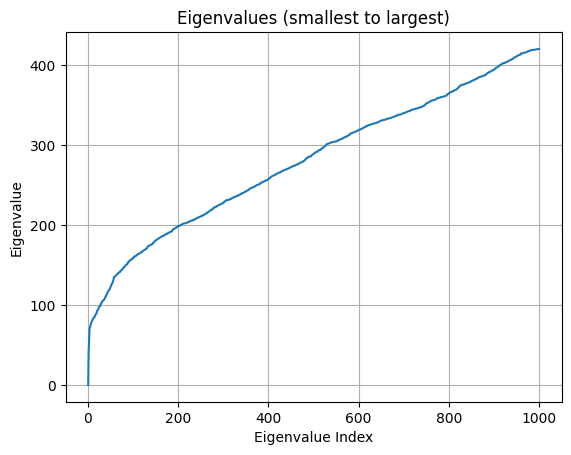

In [39]:
plt.figure()
plot_eig = plt.plot(range(1, len(teigenvalues) + 1), sorted(teigenvalues))
plt.xlabel('Eigenvalue Index')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues (smallest to largest)')
plt.grid(True)

# Store the plot in the answers dictionary
answers = {}
answers["eigenvalue plot"] = plot_eig

plt.show()

In [29]:
max_ari2 = -float('inf')
target_sse = None
for i in range(len(groups)):
        if groups[i]["ARI"] > max_ari2:
            max_ari2 = groups[i]["ARI"]
            target_sse = groups[i]["SSE"]
target_sse

1574.8050303961593

slice:0 SSE 1803.9799699448781:
slice:0 ARI 0.5465816898693608:
Cluster distribution:
Cluster 0: 209 points
Cluster 1: 332 points
Cluster 2: 260 points
Cluster 3: 64 points
Cluster 4: 135 points


C:\Users\11203\AppData\Local\Temp\ipykernel_29420\1926888580.py:16: RuntimeWarning: invalid value encountered in scalar divide
  ARI = (n_ij_combinations - expected_index) / (max_index - expected_index)


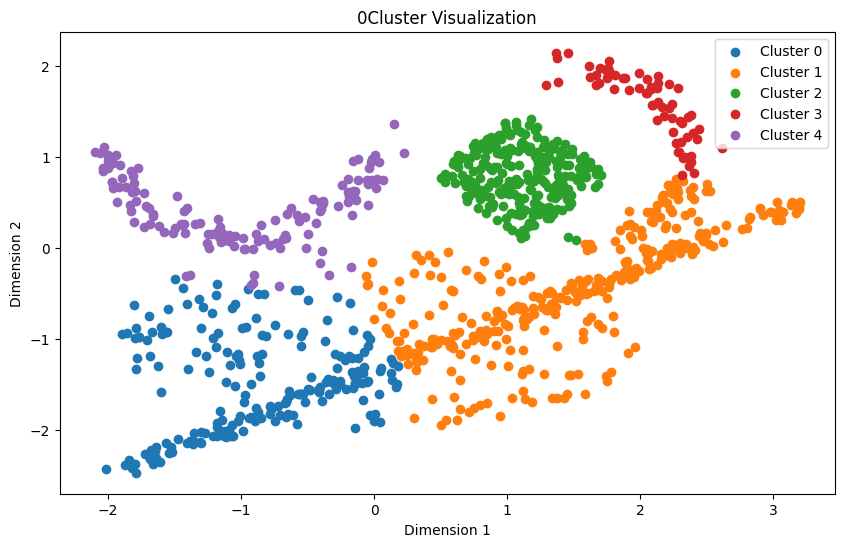

slice:1 SSE 1357.9070188177216:
slice:1 ARI 0.5771458665253713:
Cluster distribution:
Cluster 0: 196 points
Cluster 1: 134 points
Cluster 2: 269 points
Cluster 3: 289 points
Cluster 4: 112 points


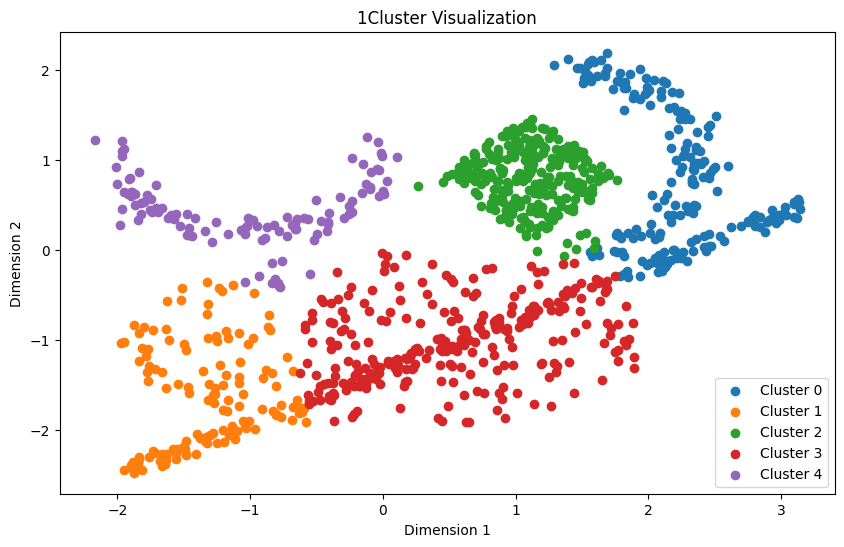

slice:2 SSE 1468.268459681646:
slice:2 ARI 0.5659289380708364:
Cluster distribution:
Cluster 0: 61 points
Cluster 1: 232 points
Cluster 2: 260 points
Cluster 3: 297 points
Cluster 4: 150 points


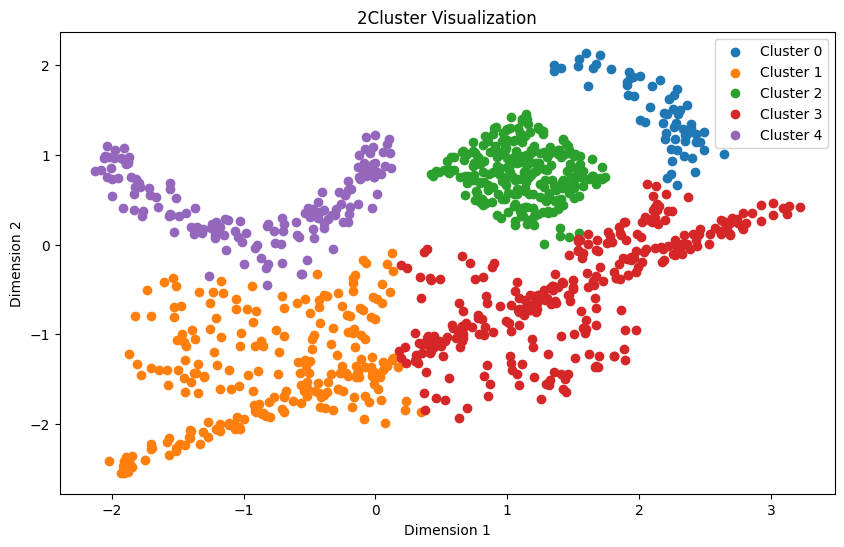

slice:3 SSE 1446.400073978266:
slice:3 ARI 0.5319773958172866:
Cluster distribution:
Cluster 0: 89 points
Cluster 1: 237 points
Cluster 2: 138 points
Cluster 3: 259 points
Cluster 4: 277 points


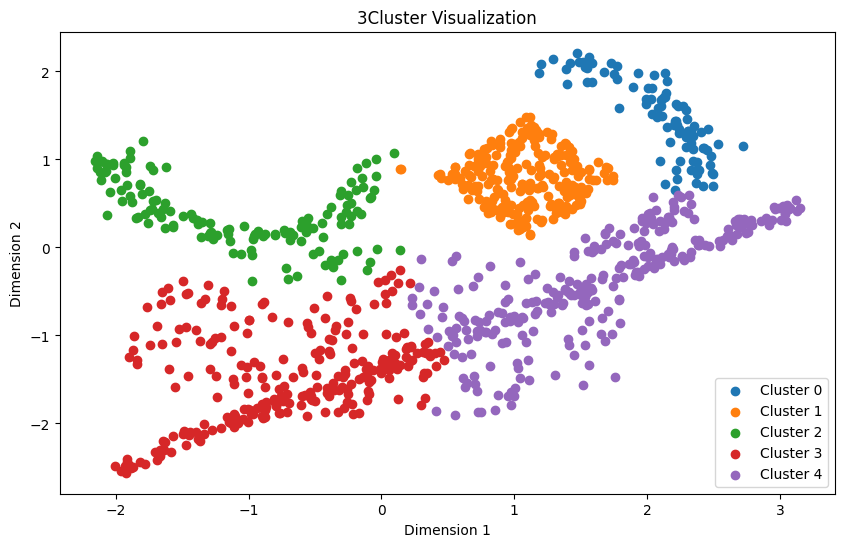

slice:4 SSE 1586.970166332219:
slice:4 ARI 0.5787256696464671:
Cluster distribution:
Cluster 0: 214 points
Cluster 1: 356 points
Cluster 2: 252 points
Cluster 3: 48 points
Cluster 4: 130 points


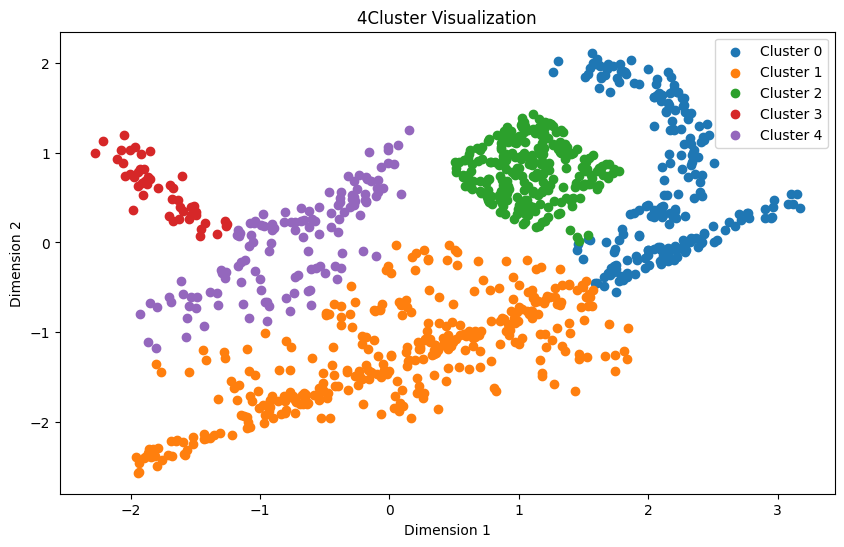

Average SSE: 1532.7051377509463
Average ARI: 0.5600719119858645


In [25]:
average_sse = 0
average_ari = 0
sse_list=[]
ari_list=[]
for i in range(5):
    sigma=best_sigma
    smatrix=construct_similarity_matrix(slice[i],sigma)
    L_matrix=compute_l(smatrix)
    eigenvectors_L=calculate_eigens(L_matrix,number_clusters)
    normalized_eigenvectors = eigenvectors_L / np.linalg.norm(eigenvectors_L, axis=1, keepdims=True)
    clusters,centroids = k_means(normalized_eigenvectors, number_clusters, iterations)
    sse = compute_sse(normalized_eigenvectors, slice_labels[i], centroids)
    print(f"slice:{i} SSE {sse}:")
    ari=calculate_ari(slice_labels[i],clusters)
    print(f"slice:{i} ARI {ari}:")
    groups[i]= {"sigma": sigma, "ARI": ari, "SSE": sse}
    average_sse += sse
    average_ari += ari
    sse_list.append(sse)
    ari_list.append(ari)
    
    unique_clusters, counts = np.unique(clusters, return_counts=True)
    print("Cluster distribution:")
    for cluster, count in zip(unique_clusters, counts):
        print(f"Cluster {cluster}: {count} points")

    plt.figure(figsize=(10, 6))
    for cluster in unique_clusters:
        # Extract points belonging to the current cluster
        cluster_points = slice[i][clusters == cluster]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')

    plt.title(f'{i}Cluster Visualization')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.legend()
    plt.show()
average_sse /= 5  # Divide by the number of slices
average_ari /= 5  # Divide by the number of slices

print(f"Average SSE: {average_sse}")
print(f"Average ARI: {average_ari}")

0.021461815749540553

In [26]:
groups

{0: {'sigma': 0.2, 'ARI': 0.5465816898693608, 'SSE': 1803.9799699448781},
 1: {'sigma': 0.2, 'ARI': 0.5771458665253713, 'SSE': 1357.9070188177216},
 2: {'sigma': 0.2, 'ARI': 0.5659289380708364, 'SSE': 1468.268459681646},
 3: {'sigma': 0.2, 'ARI': 0.5319773958172866, 'SSE': 1446.400073978266},
 4: {'sigma': 0.2, 'ARI': 0.5787256696464671, 'SSE': 1586.970166332219}}

In [14]:
sigmas = [group["sigma"] for group in groups.values()]
ARI_values = [group["ARI"] for group in groups.values()]
SSE_values = [group["SSE"] for group in groups.values()]

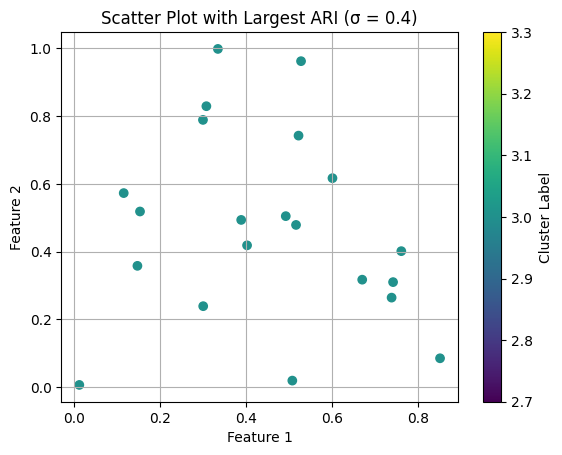

In [17]:
eigenvalues_group = [1.2, 3.4, 5.6, 7.8, 9.0]
groups = {
    0: {"sigma": 0.1, "ARI": 0.8},
    1: {"sigma": 0.2, "ARI": 0.7},
    2: {"sigma": 0.3, "ARI": 0.6},
    3: {"sigma": 0.4, "ARI": 0.9},
    4: {"sigma": 0.5, "ARI": 0.5}
}
data = np.random.rand(100, 2)
labels = np.random.randint(0, 5, size=100)

# Convert eigenvalues_group to a list
eigenvalues = list(eigenvalues_group)

# Find the index of the group with the largest ARI
largest_ARI_index = max(groups, key=lambda i: groups[i]["ARI"])

# Select data and labels corresponding to the largest ARI
data_largest_ARI = data[labels == largest_ARI_index]
labels_largest_ARI = labels[labels == largest_ARI_index]

# Create a scatter plot
plt.figure()
plot_ARI = plt.scatter(data_largest_ARI[:, 0], data_largest_ARI[:, 1], c=labels_largest_ARI, cmap='viridis', label='Data Points')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'Scatter Plot with Largest ARI (σ = {groups[largest_ARI_index]["sigma"]})')
plt.colorbar(label='Cluster Label')
plt.grid(True)

# Store the scatter plot in the answers dictionary
answers = {}
answers["cluster scatterplot"] = plot_ARI

plt.show()

In [27]:
sigma_list=[1]
i=0
sigma=sigma_list[i]
smatrix=construct_similarity_matrix(slice[0],sigma)
L_matrix=compute_l(smatrix)
eigenvectors_L=calculate_eigens(L_matrix,number_clusters)
normalized_eigenvectors = eigenvectors_L / np.linalg.norm(eigenvectors_L, axis=1, keepdims=True)
clusters,centroids = k_means(normalized_eigenvectors, number_clusters, iterations)
sse = compute_sse(normalized_eigenvectors, slice_labels[0], centroids)
print(f"sigma:{sigma_list[i]}SSE {sse}:")
ari=calculate_ari(slice_labels[0],clusters)
print(f"sigma:{sigma_list[i]}ARI {ari}:")


sigma:1SSE 4290.122295069915:
sigma:1ARI 0.2722827741728932:


C:\Users\11203\AppData\Local\Temp\ipykernel_8548\1926888580.py:16: RuntimeWarning: invalid value encountered in scalar divide
  ARI = (n_ij_combinations - expected_index) / (max_index - expected_index)


In [12]:
sigma=10
smatrix=construct_similarity_matrix(data,sigma)
smatrix.shape

(2000, 2000)

In [13]:
L_matrix=compute_l(smatrix)
L_matrix

array([[ 1.96035539e+03, -9.83950764e-01, -9.92608306e-01, ...,
        -9.85995671e-01, -9.86056701e-01, -9.52711924e-01],
       [-9.83950764e-01,  1.95347112e+03, -9.98003067e-01, ...,
        -9.84710630e-01, -9.63838175e-01, -9.65263871e-01],
       [-9.92608306e-01, -9.98003067e-01,  1.96549144e+03, ...,
        -9.91441114e-01, -9.77730842e-01, -9.69588029e-01],
       ...,
       [-9.85995671e-01, -9.84710630e-01, -9.91441114e-01, ...,
         1.96697942e+03, -9.92743003e-01, -9.89750720e-01],
       [-9.86056701e-01, -9.63838175e-01, -9.77730842e-01, ...,
        -9.92743003e-01,  1.95365956e+03, -9.75233315e-01],
       [-9.52711924e-01, -9.65263871e-01, -9.69588029e-01, ...,
        -9.89750720e-01, -9.75233315e-01,  1.93006992e+03]])

In [14]:
eigenvectors_L=calculate_eigens(L_matrix,number_clusters)
eigenvectors_L.shape

(2000, 5)

In [15]:
normalized_eigenvectors = eigenvectors_L / np.linalg.norm(eigenvectors_L, axis=1, keepdims=True)

In [16]:
clusters,centroids = k_means(normalized_eigenvectors, number_clusters, iterations)

print(clusters.shape)
print(centroids.shape)

(2000,)
(5, 5)


In [53]:
'''print(labels.shape)
labels_adjust=labels-1
print(labels_adjust.shape)'''

(6750,)
(6750,)


In [17]:
unique_clusters, counts = np.unique(clusters, return_counts=True)
print("Cluster distribution:")
for cluster, count in zip(unique_clusters, counts):
    print(f"Cluster {cluster}: {count} points")

Cluster distribution:
Cluster 0: 309 points
Cluster 1: 61 points
Cluster 2: 233 points
Cluster 3: 830 points
Cluster 4: 567 points


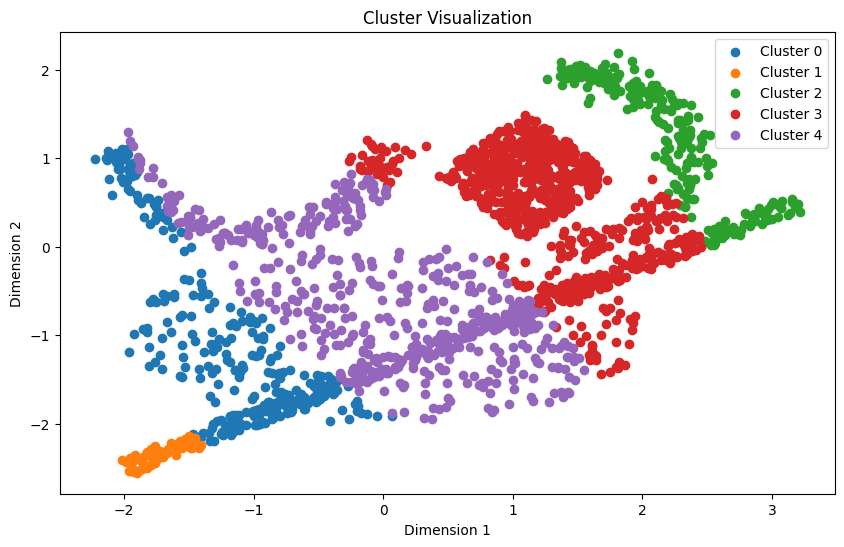

In [18]:
plt.figure(figsize=(10, 6))
for cluster in unique_clusters:
    # Extract points belonging to the current cluster
    cluster_points = data[clusters == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')

plt.title('Cluster Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

In [22]:
sse = compute_sse(normalized_eigenvectors, labels, centroids)
print("SSE:", sse)

SSE: 460.08124094686127


In [55]:
labels

array([1, 1, 1, ..., 3, 3, 3], dtype=int64)

In [23]:
array_list = labels.tolist()
unique_values, counts = np.unique(labels, return_counts=True)
unique_values_list = unique_values.tolist()

print("Unique values:", unique_values_list)
print("Counts:", counts.tolist())  # Convert counts to list if you need it as a list

# If you need to pair the unique values with counts in a more 'Pythonic' way:
unique_counts = list(zip(unique_values_list, counts))
print("Unique values and counts paired:", unique_counts)

Unique values: [0, 1, 2, 3, 4]
Counts: [517, 249, 261, 497, 476]
Unique values and counts paired: [(0, 517), (1, 249), (2, 261), (3, 497), (4, 476)]


In [21]:
sigma=1
smatrix=construct_similarity_matrix(data,sigma)
L_matrix=compute_l(smatrix)
eigenvectors_L=calculate_eigens(L_matrix,number_clusters)
normalized_eigenvectors = eigenvectors_L / np.linalg.norm(eigenvectors_L, axis=1, keepdims=True)
clusters = k_means(normalized_eigenvectors, number_clusters, iterations)
unique_clusters, counts = np.unique(clusters, return_counts=True)
print("Cluster distribution:")
for cluster, count in zip(unique_clusters, counts):
    print(f"Cluster {cluster}: {count} points")
plt.figure(figsize=(10, 6))
for cluster in unique_clusters:
    # Extract points belonging to the current cluster
    cluster_points = data[clusters == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')

plt.title('Cluster Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

KeyboardInterrupt: 

In [1]:
sigma_list=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

Cluster distribution:
Cluster 0: 1204 points
Cluster 1: 1875 points
Cluster 2: 2505 points
Cluster 3: 537 points
Cluster 4: 629 points


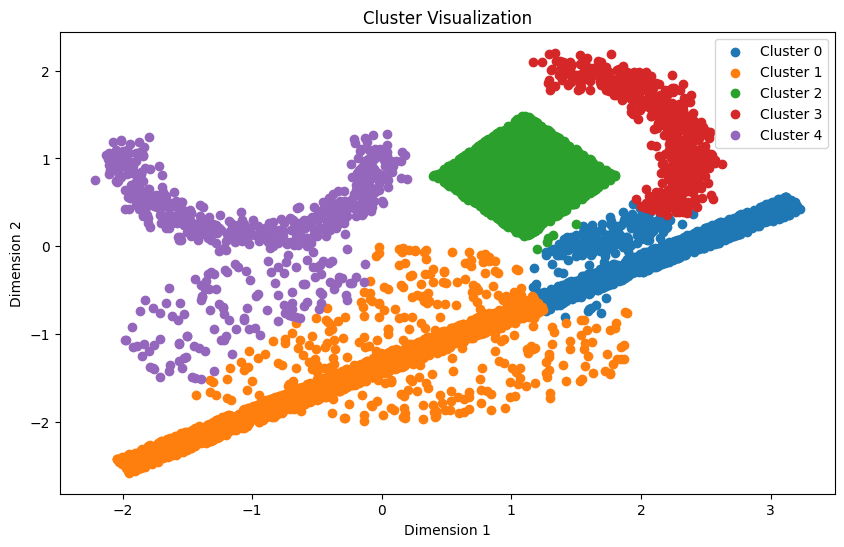

Cluster distribution:
Cluster 0: 470 points
Cluster 1: 1843 points
Cluster 2: 2555 points
Cluster 3: 1260 points
Cluster 4: 622 points


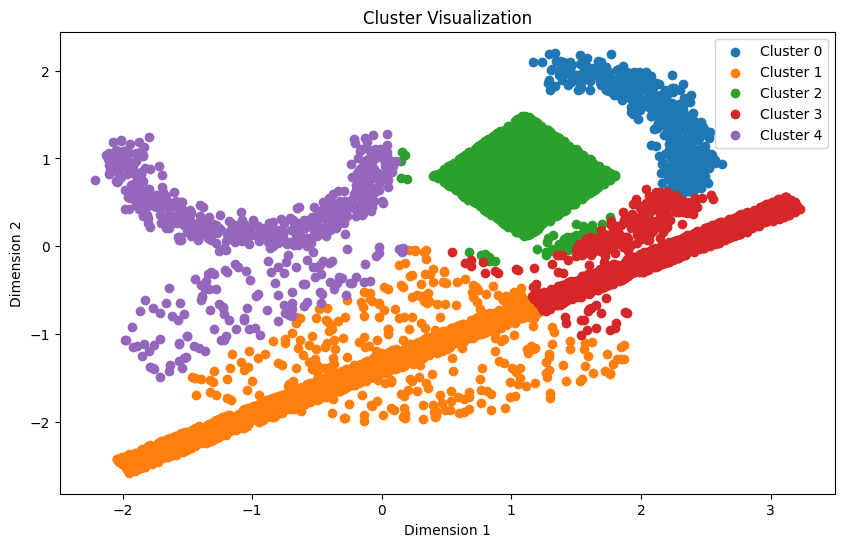

Cluster distribution:
Cluster 0: 1387 points
Cluster 1: 2619 points
Cluster 2: 633 points
Cluster 3: 638 points
Cluster 4: 1473 points


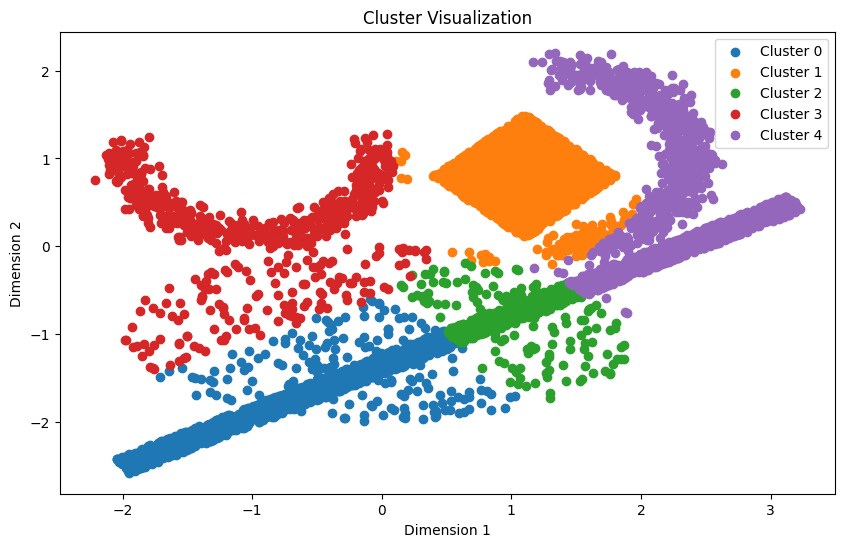

Cluster distribution:
Cluster 0: 511 points
Cluster 1: 478 points
Cluster 2: 436 points
Cluster 3: 4127 points
Cluster 4: 1198 points


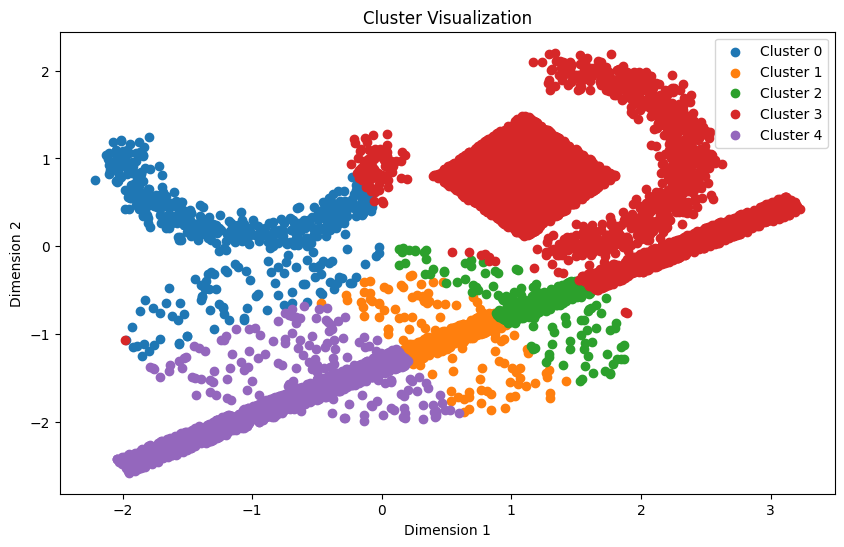

Cluster distribution:
Cluster 0: 440 points
Cluster 1: 462 points
Cluster 2: 1122 points
Cluster 3: 4276 points
Cluster 4: 450 points


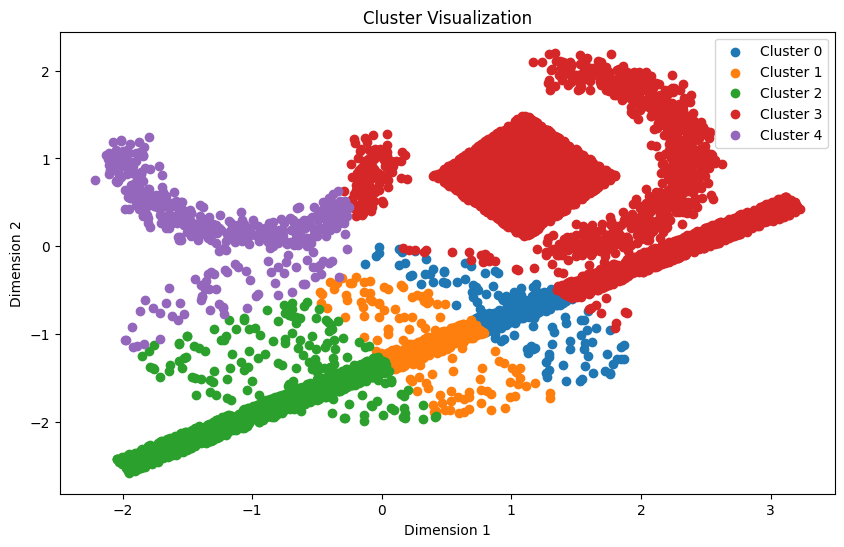

Cluster distribution:
Cluster 0: 965 points
Cluster 1: 439 points
Cluster 2: 505 points
Cluster 3: 451 points
Cluster 4: 4390 points


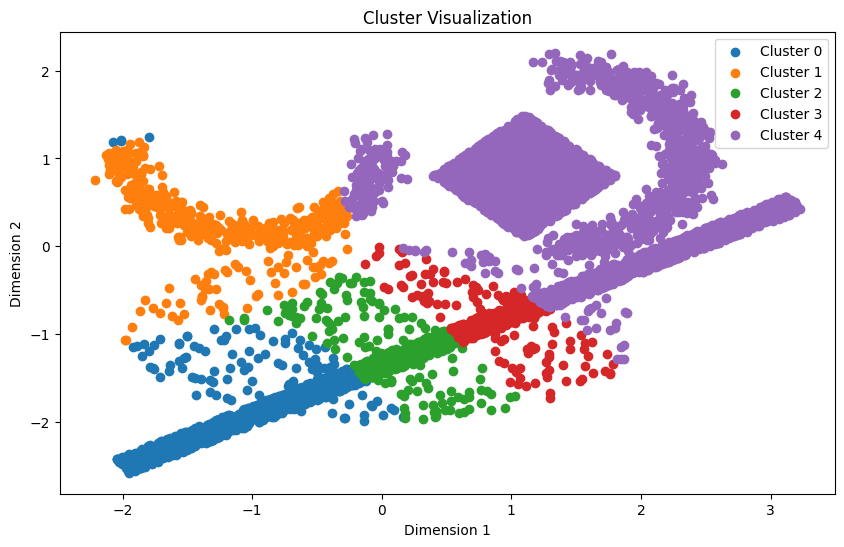

Cluster distribution:
Cluster 0: 983 points
Cluster 1: 502 points
Cluster 2: 4410 points
Cluster 3: 490 points
Cluster 4: 365 points


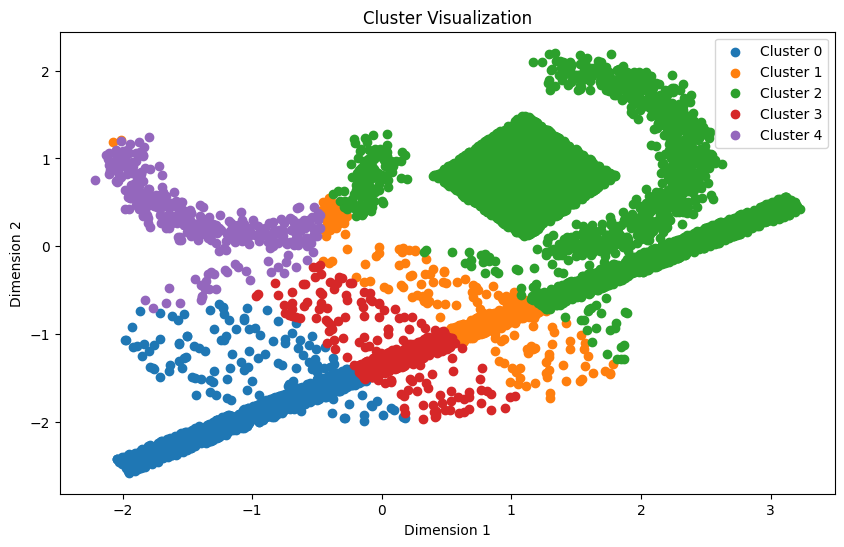

Cluster distribution:
Cluster 0: 4456 points
Cluster 1: 335 points
Cluster 2: 483 points
Cluster 3: 924 points
Cluster 4: 552 points


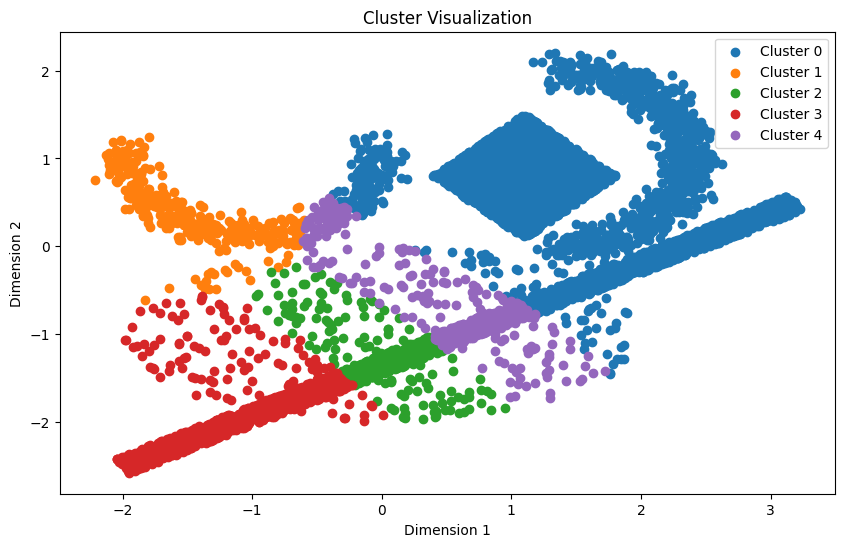

Cluster distribution:
Cluster 0: 591 points
Cluster 1: 876 points
Cluster 2: 4497 points
Cluster 3: 489 points
Cluster 4: 297 points


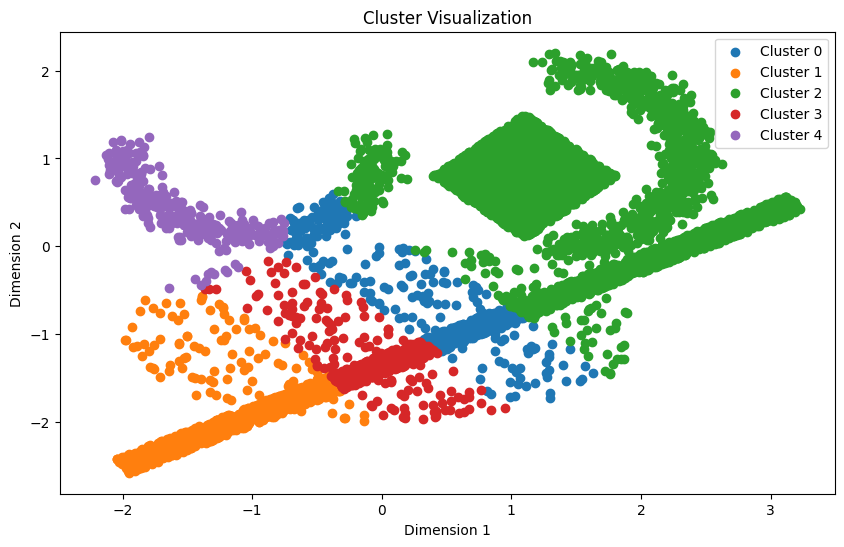

KeyboardInterrupt: 

In [10]:
for sigma in sigma_list:
    smatrix=construct_similarity_matrix(data,sigma)
    L_matrix=compute_l(smatrix)
    eigenvectors_L=calculate_eigens(L_matrix,number_clusters)
    normalized_eigenvectors = eigenvectors_L / np.linalg.norm(eigenvectors_L, axis=1, keepdims=True)
    clusters = k_means(normalized_eigenvectors, number_clusters, iterations)
    unique_clusters, counts = np.unique(clusters, return_counts=True)
    print("Cluster distribution:")
    for cluster, count in zip(unique_clusters, counts):
        print(f"Cluster {cluster}: {count} points")
    plt.figure(figsize=(10, 6))
    for cluster in unique_clusters:
    # Extract points belonging to the current cluster
        cluster_points = data[clusters == cluster]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')
    plt.title('Cluster Visualization')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.legend()
    plt.show()

In [ ]:
def compute_sse(data_points, cluster_labels, centroids):
    sse = 0.0
    for i, centroid in enumerate(centroids):
        cluster_data = data_points[cluster_labels == i]
        sse += np.sum((cluster_data - centroid) ** 2)
    return sse

In [ ]:
def compute_ari(true_labels, cluster_labels):
    assert len(true_labels) == len(cluster_labels), "Label vectors must be of the same length."
    
    # Get the unique classes
    true_classes = np.unique(true_labels)
    cluster_classes = np.unique(cluster_labels)
    
    # Create the contingency matrix
    cont_matrix = np.zeros((len(true_classes), len(cluster_classes)), dtype=int)
    
    for i, true_class in enumerate(true_classes):
        for j, cluster_class in enumerate(cluster_classes):
            cont_matrix[i, j] = np.sum((true_labels == true_class) & (cluster_labels == cluster_class))
    
    # Calculate a, b, c, d
    sum_total = np.sum(cont_matrix)
    sum_rows = np.sum(cont_matrix, axis=1)
    sum_cols = np.sum(cont_matrix, axis=0)
    
    a = np.sum(cont_matrix * (cont_matrix - 1)) / 2
    b_c = np.sum(sum_rows * (sum_rows - 1)) / 2 - a
    d = np.sum(sum_cols * (sum_cols - 1)) / 2 - a
    n_choose_2 = sum_total * (sum_total - 1) / 2
    
    # Calculate Rand Index (RI) and Expected RI
    RI = (a + (n_choose_2 - a - b_c - d)) / n_choose_2
    expected_RI = (sum_rows * sum_cols) / n_choose_2**2
    
    # Adjusted Rand Index
    max_RI = (sum_rows * (sum_rows - 1) + sum_cols * (sum_cols - 1)) / (2 * n_choose_2)
    ARI = (RI - expected_RI) / (max_RI - expected_RI)
    
    return ARI

In [ ]:
import numpy as np

def compute_sse(data_points, cluster_labels, centroids):
    sse = 0.0
    for i, centroid in enumerate(centroids):
        cluster_data = data_points[cluster_labels == i]
        sse += np.sum((cluster_data - centroid) ** 2)
    return sse

def compute_ari(true_labels, cluster_labels):
    # Dummy implementation for ARI calculation
    # You would need an actual implementation or use an external library normally
    # This is a placeholder to show where ARI would be computed
    pass

def run_clustering(data_points, true_labels, num_runs=5):
    results = []
    # Assuming you have some function or method to get centroids based on cluster labels
    centroids = calculate_centroids(data_points, cluster_labels)
    
    for _ in range(num_runs):
        # Assume `perform_clustering` is a function that applies your clustering algorithm
        # Here you would randomize parameters or data initialization
        cluster_labels = perform_clustering(data_points)
        centroids = calculate_centroids(data_points, cluster_labels)
        
        sse = compute_sse(data_points, cluster_labels, centroids)
        ari = compute_ari(true_labels, cluster_labels)
        
        results.append((sse, ari))
    
    sses, aris = zip(*results)
    average_sse = np.mean(sses)
    std_sse = np.std(sses)
    average_ari = np.mean(aris)
    std_ari = np.std(aris)
    
    return {
        'average_sse': average_sse, 'std_sse': std_sse,
        'average_ari': average_ari, 'std_ari': std_ari
    }

# Example usage
data_points = np.random.rand(100, 2)  # Example dataset
true_labels = np.random.randint(0, 3, 100)  # Example true labels
results = run_clustering(data_points, true_labels)
print(results)